# Semeion Handwritten Digit Data Set

http://archive.ics.uci.edu/ml/datasets/Semeion+Handwritten+Digit

In [1]:
import pandas as pd

data_set = 'data_sets/semeion.data'

names = map(str, range(0,256))

for i in range(1,11):
    names.append(str('y_%d' % i))

target_names = names[256:]  
data_names = names[:256]
 

df = pd.read_csv(data_set, index_col=False, delimiter = r"\s+", names = names )



In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Columns: 266 entries, 0 to y_10
dtypes: float64(256), int64(10)
memory usage: 3.2 MB
None
                 0            1            2            3            4  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.095417     0.153798     0.231011     0.301318     0.380414   
std       0.293883     0.360868     0.421612     0.458975     0.485641   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.464532   

In [6]:
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10
911,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1492,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1302,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0


### Отрисовка усредненных значений

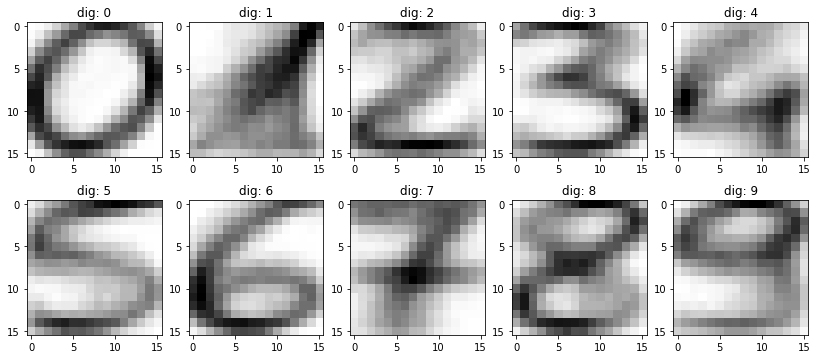

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.figure(figsize=(14,6))


for i in range(1,11):
    key = 'y_%d' % i 
    v = df[df[key]==1].mean(axis=0).values[:256]  
    ax = plt.subplot(2,5, i)  
    plt.title( 'dig: %d' % (i-1))
    ax.imshow(v.reshape(16,16), cmap=plt.cm.gray_r)  

plt.show()    

### Распределение по классам

<BarContainer object of 10 artists>

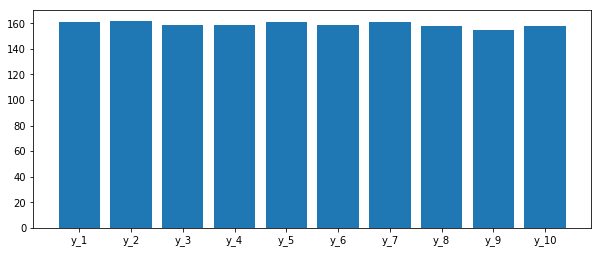

In [8]:
 
data = df[target_names].sum().values 
plt.figure(figsize = (10, 4))
plt.bar(target_names, data)


### Корреляция

Возьмем корреляцию Спирмена (так как она более устойчива к выбросам) И отберем 10 признаков (пикселей) наиболее весомых для каждого класса

In [12]:
map_max_corr = {}

for target in target_names: 
    values = []
    for name in data_names: 
        c = df[[target, name]].corr()
        values.append((name, c.values[0][1] ** 2))
    values.sort (key=lambda i: i[1], reverse=True)  
    
    cols = map(lambda i: i[0] ,values[:10])
    map_max_corr[target] = cols

In [13]:
import seaborn as sns 

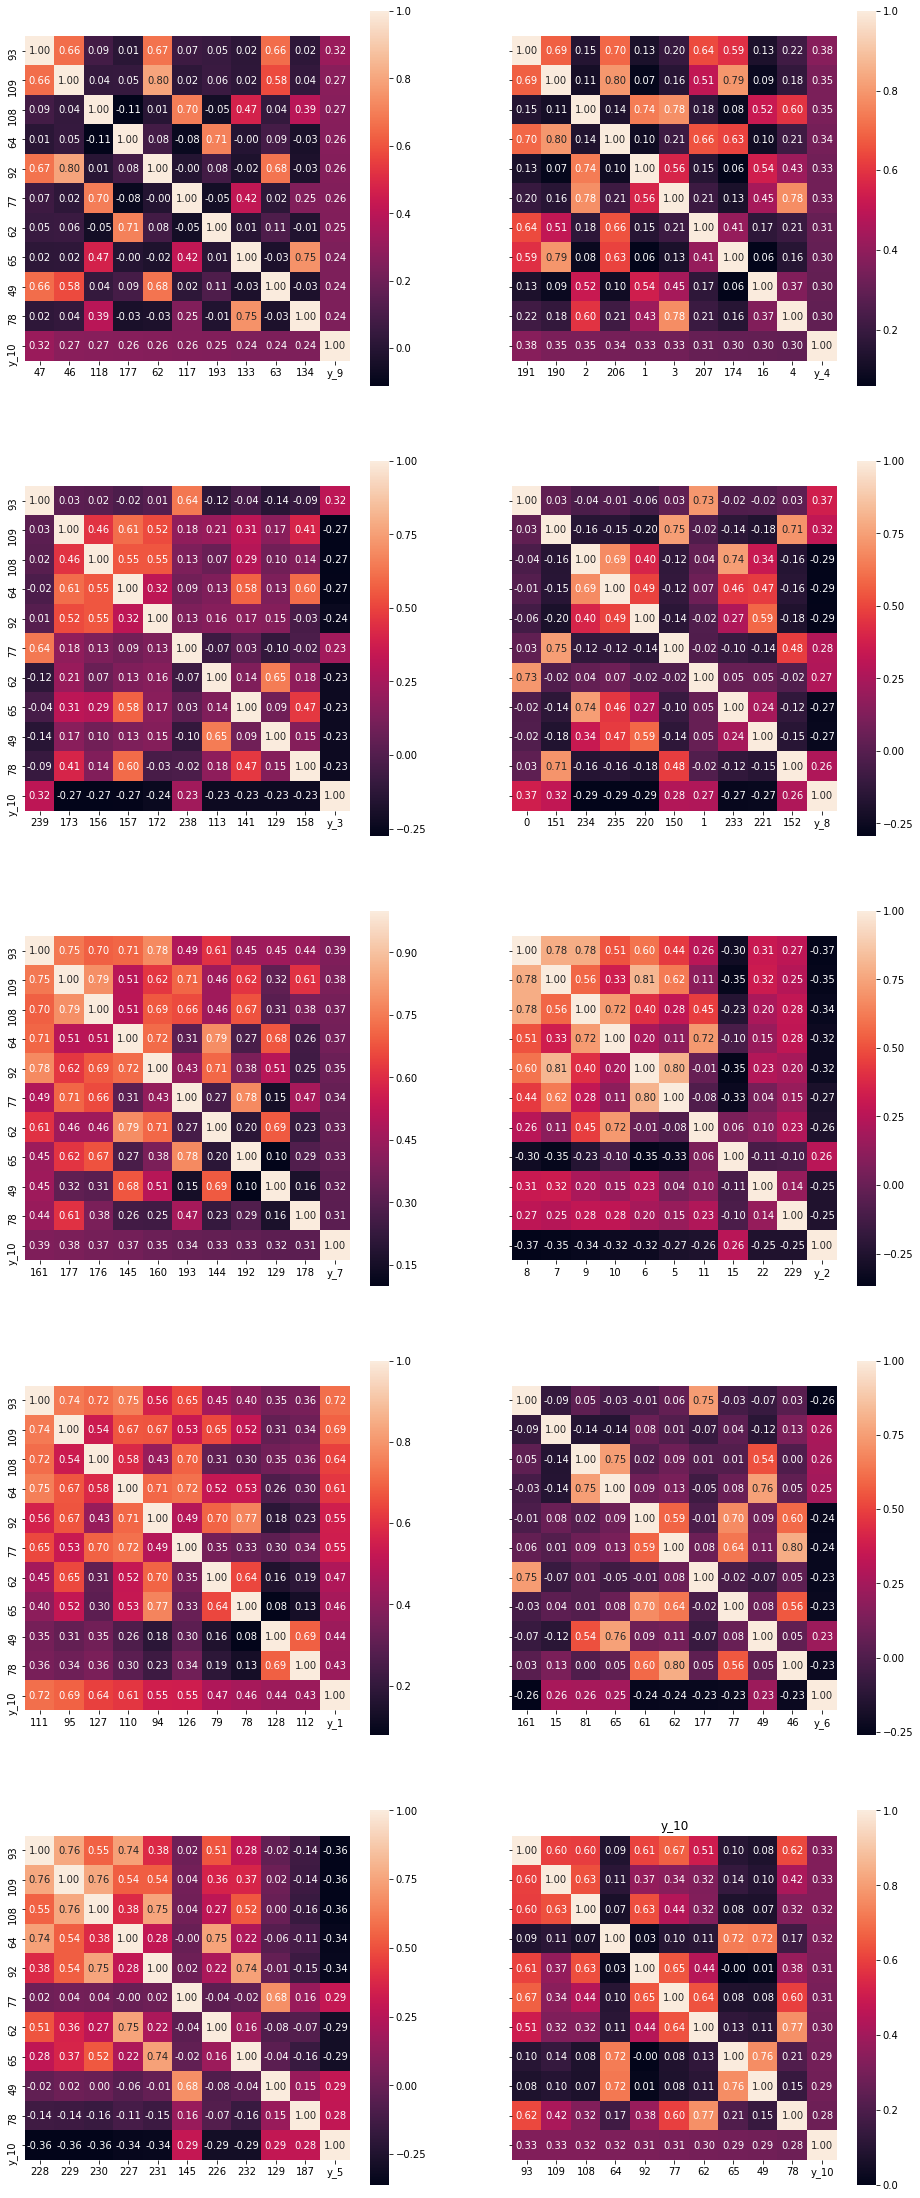

In [14]:
a4_dims = (16., 8.*5)
_,axs = plt.subplots(5,2,figsize=a4_dims,sharey=True) 

i = 0
for target in map_max_corr: 
    
    cols = map_max_corr[target][:]
    cols.append(target)
    corr = df[cols].corr('spearman')   
     
    plt.title(target)
    sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', ax=axs[i%5][i%2],
                 yticklabels=cols, xticklabels=cols)
   
    i = i + 1 
    


### Распределение

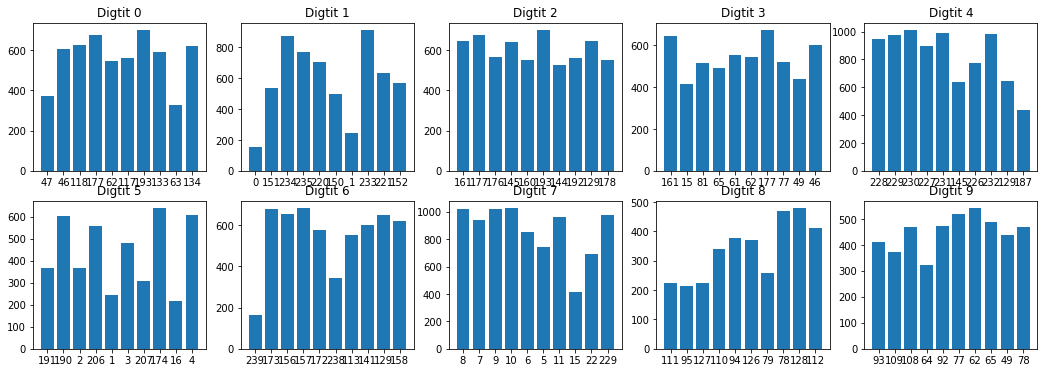

In [16]:

plt.figure(figsize = (18,6))
i = 0
for target in map_max_corr:  
    cols = map_max_corr[target]  
    
    ax = plt.subplot(2,5, i+1)
    ax.set_title("Digtit %d" % i)
    ax.bar(cols, df[cols].sum()) 
   
    i = i + 1 

### Отберем наиболее часто встречаемые признаки

In [15]:
map_max_each = {}

for target in target_names: 
    values = []
    c = df[df[target]==1][data_names].sum()
    
    for name in data_names: 
        values.append((name, c[name])) 
    values.sort (key=lambda i: i[1], reverse=True)  
    
    cols = map(lambda i: i[0] ,values[:10])
    map_max_each[target] = cols
#print(map_max_each)    

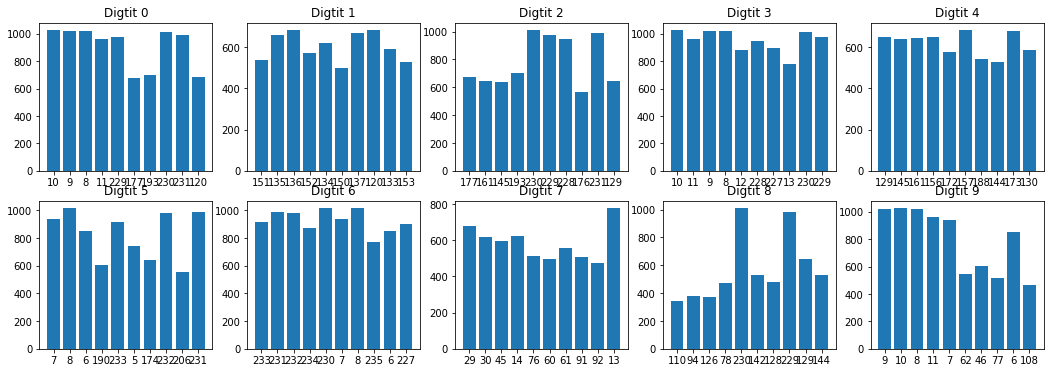

In [16]:
plt.figure(figsize = (18,6))
i = 0
for target in map_max_each:  
    cols = map_max_each[target]  
    
    ax = plt.subplot(2,5, i+1)
    ax.set_title("Digtit %d" % i)
    ax.bar(cols, df[cols].sum()) 
   
    i = i + 1 

### Разбиваем множество на обучающее и тестовое

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[data_names], df[target_names], test_size=0.30, random_state=42)


<BarContainer object of 10 artists>

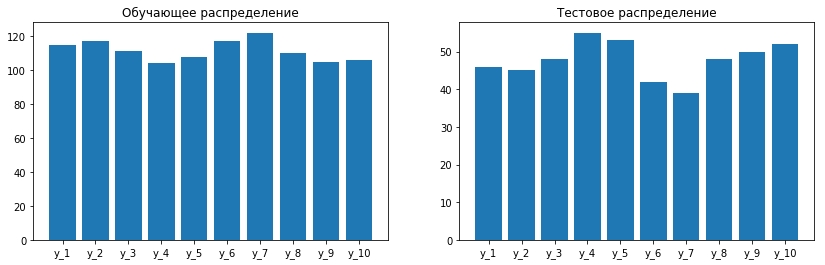

In [18]:
 
plt.figure(figsize = (14, 4))
ax = plt.subplot(1,2, 1) 
plt.title(u'Обучающее распределение')
ax.bar(target_names, y_train.sum())
ax = plt.subplot(1,2, 2) 
plt.title(u'Тестовое распределение')
ax.bar(target_names, y_test.sum())

### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


In [24]:
knn = KNeighborsClassifier(p=2) 
knn.fit(X_train, y_train) 
print(knn.score(X_test, y_test)) 

?KNeighborsClassifier

0.8786610878661087


In [25]:
print classification_report(knn.predict(X_test), y_test)


             precision    recall  f1-score   support

          0       0.98      0.92      0.95        49
          1       0.98      0.79      0.87        56
          2       0.90      0.90      0.90        48
          3       0.91      0.96      0.93        52
          4       0.89      0.98      0.93        48
          5       0.98      0.93      0.95        44
          6       0.92      0.97      0.95        37
          7       0.81      1.00      0.90        39
          8       0.70      0.97      0.81        36
          9       0.77      0.95      0.85        42

avg / total       0.89      0.93      0.91       451



### Дерево решений

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tree = DecisionTreeClassifier(random_state=42) 
tree.fit(X_train, y_train)
 
print(tree.score(X_test, y_test)) 

0.7112970711297071


In [40]:
print classification_report(tree.predict(X_test), y_test)

             precision    recall  f1-score   support

          0       0.76      0.85      0.80        41
          1       0.78      0.78      0.78        45
          2       0.62      0.59      0.61        51
          3       0.85      0.78      0.82        60
          4       0.66      0.73      0.69        48
          5       0.88      0.70      0.78        53
          6       0.90      0.74      0.81        47
          7       0.52      0.64      0.57        39
          8       0.62      0.63      0.63        49
          9       0.58      0.67      0.62        45

avg / total       0.73      0.71      0.71       478



### Случайный лес

In [29]:
from sklearn.ensemble import RandomForestClassifier

?RandomForestClassifier

In [31]:
# Стало лучше при n_estimators = 25
for i in [10,20,25,30,50,100]:
    clf = RandomForestClassifier(n_estimators = i, max_depth=None, random_state=42) 
    clf.fit(X_train, y_train)

    print(i)
    print(clf.score(X_test, y_test)) 

10
0.6234309623430963
20
0.6673640167364017
25
0.7133891213389121
30
0.6820083682008368
50
0.7154811715481172
100
0.7112970711297071


In [32]:
print classification_report(clf.predict(X_test), y_test)
tree_feature_importances = clf.feature_importances_

             precision    recall  f1-score   support

          0       0.89      1.00      0.94        41
          1       0.84      0.97      0.90        39
          2       0.50      1.00      0.67        24
          3       0.76      1.00      0.87        42
          4       0.58      1.00      0.74        31
          5       0.83      1.00      0.91        35
          6       0.92      0.95      0.94        38
          7       0.58      1.00      0.74        28
          8       0.50      1.00      0.67        25
          9       0.77      1.00      0.87        40

avg / total       0.74      0.99      0.84       343



#### Используем map_max_each 

In [33]:
sets_col = set()
for traget in map_max_each:
    for name in map_max_each[traget]:
        sets_col.add(name)
print("Len columns: %d"  %len(sets_col))
        
list_col = list(sets_col)    
clf = RandomForestClassifier(n_estimators = 25, max_depth=None, random_state=42) 
clf.fit(X_train[list_col], y_train)
 
print(clf.score(X_test[list_col], y_test)) 
print classification_report(clf.predict(X_test[list_col]), y_test)

Len columns: 63
0.6610878661087866
             precision    recall  f1-score   support

          0       0.80      1.00      0.89        37
          1       0.82      0.90      0.86        41
          2       0.62      1.00      0.77        30
          3       0.60      1.00      0.75        33
          4       0.66      0.97      0.79        36
          5       0.79      0.89      0.84        37
          6       0.90      0.90      0.90        39
          7       0.44      0.95      0.60        22
          8       0.56      0.93      0.70        30
          9       0.52      0.82      0.64        33

avg / total       0.69      0.93      0.79       338



### Используем самые важные показатели feature_importances_

In [34]:
 
values = []
for n in range(0,len(tree_feature_importances)):
    values.append( (str(n+1), tree_feature_importances[n]) )
values.sort (key=lambda i: i[1], reverse=True)  
        
cols = map(lambda i: i[0] ,  values) 

In [35]:
scores = []
ncols = [25, 50, 75, 100, 125, 150, 175, 200]
for n in ncols:
    list_col = cols[0:n]  
    clf = RandomForestClassifier(n_estimators = 25, max_depth=None, random_state=42) 
    clf.fit(X_train[list_col], y_train)
 
    score = clf.score(X_test[list_col], y_test)
    scores.append(score)
    print("Score %d - %.4f" % (n, score)) 
    print classification_report(clf.predict(X_test[list_col]), y_test)

Score 25 - 0.5460
             precision    recall  f1-score   support

          0       0.83      0.95      0.88        40
          1       0.71      0.64      0.67        50
          2       0.35      0.68      0.47        25
          3       0.33      0.55      0.41        33
          4       0.70      0.84      0.76        44
          5       0.55      0.66      0.60        35
          6       0.90      0.76      0.82        46
          7       0.25      0.63      0.36        19
          8       0.44      0.73      0.55        30
          9       0.52      0.82      0.64        33

avg / total       0.60      0.74      0.65       355

Score 50 - 0.6234
             precision    recall  f1-score   support

          0       0.83      0.97      0.89        39
          1       0.73      0.77      0.75        43
          2       0.31      0.83      0.45        18
          3       0.53      0.94      0.67        31
          4       0.68      0.92      0.78        39
      

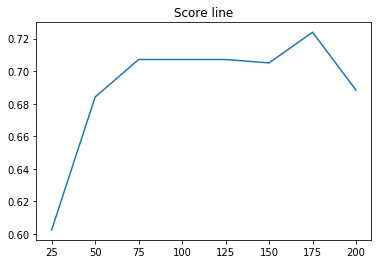

In [89]:
plt.plot(ncols, scores)
plt.title('Score line')
plt.show()

### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB


In [37]:
y_train_target = y_train.dot(np.array([0,1,2,3,4,5,6,7,8,9]))
y_test_target = y_test.dot(np.array([0,1,2,3,4,5,6,7,8,9]))

print(len(y_train_target), len(y_test_target))

(1115, 478)


In [38]:
clf = GaussianNB() 
clf.fit(X_train, y_train_target)
 
print(clf.score(X_test, y_test_target)) 

0.7907949790794979


In [39]:
print classification_report(clf.predict(X_test), y_test_target)

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        46
          1       0.93      0.46      0.62        91
          2       0.52      1.00      0.68        25
          3       0.84      0.90      0.87        51
          4       0.72      0.86      0.78        44
          5       0.83      0.95      0.89        37
          6       0.90      0.71      0.80        49
          7       0.96      0.87      0.91        53
          8       0.56      0.68      0.62        41
          9       0.75      0.95      0.84        41

avg / total       0.83      0.79      0.79       478



### Нейронная сеть

In [40]:
from sklearn.neural_network import MLPClassifier


In [41]:
# Стало лучше за счет L2 alpha=0.02

clf = MLPClassifier(alpha=0.02, hidden_layer_sizes=(200, ), random_state=42) 
%time clf.fit(X_train, y_train)
 
print(clf.score(X_test, y_test)) 

CPU times: user 11.2 s, sys: 8.81 s, total: 20 s
Wall time: 5.33 s
0.8619246861924686


In [42]:
print classification_report(clf.predict(X_test), y_test)

             precision    recall  f1-score   support

          0       0.93      0.96      0.95        45
          1       0.96      0.90      0.92        48
          2       0.96      0.96      0.96        48
          3       0.87      0.98      0.92        49
          4       0.89      0.90      0.90        52
          5       0.90      0.95      0.93        40
          6       0.95      1.00      0.97        37
          7       0.88      0.95      0.91        44
          8       0.72      0.95      0.82        38
          9       0.90      0.85      0.88        55

avg / total       0.90      0.94      0.92       456

